## Statistique inférentielle - Théorie de l'échantillonnage - Exercice 11.3

Cinq cents pignons ont un poids moyen de 5,02 gr et un écart-type de 0,30 gr. 

Trouver la probabilité pour qu’un échantillon de 100 pignons choisis au hasard ait un poids total 


(a) compris entre 496 et 500 gr, 


(b) plus grand que 510 gr.

In [9]:
import math
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import random
from statistics import mean 

random.seed(1968)

Petite subtilité par rapport aux deux exercices précédents... ici, on parle du poids total de l'échantillon et pas du poids moyen des pièces de l'échantillon.
Pour passer de l'un à l'autre, il suffit de multiplier par le nombre de pièces dans l'échantillon.

In [10]:
mu = 5.02
sigma = 0.30
N = 500

taille_echantillon = 100

In [11]:
sigma_echantillon_exhaustif = sigma/math.sqrt(taille_echantillon)*math.sqrt((N-taille_echantillon)/(N-1))

In [12]:
sigma_echantillon_exhaustif

0.026859688862150715

In [13]:
def distr_poids_echantillon(x):
    return norm.pdf((x['poids_piece']-mu)/sigma_echantillon_exhaustif)/sigma_echantillon_exhaustif

In [14]:
fac = 5
poids_min = mu - fac*sigma_echantillon_exhaustif
poids_max = mu + fac*sigma_echantillon_exhaustif

distribution_echantillon_df = pd.DataFrame({'poids_piece':np.linspace(poids_min,poids_max,150)})
distribution_echantillon_df['dens'] = distribution_echantillon_df.apply(distr_poids_echantillon,axis=1)

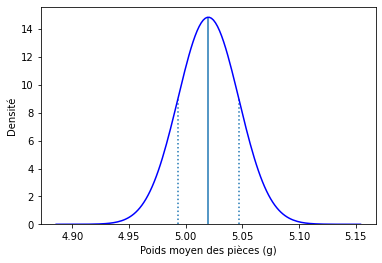

In [15]:
plt.plot(distribution_echantillon_df['poids_piece'],distribution_echantillon_df['dens'],color='blue')
plt.vlines(mu,ymin=0,ymax=norm.pdf(0)/sigma_echantillon_exhaustif)
plt.vlines([mu-sigma_echantillon_exhaustif,mu+sigma_echantillon_exhaustif],ymin=0,ymax=norm.pdf(1)/sigma_echantillon_exhaustif,linestyles='dotted')
plt.xlabel('Poids moyen des pièces (g)')
plt.ylabel('Densité')
plt.ylim(bottom=0)
plt.show()

In [16]:
distribution_echantillon_df['poids_echantillon'] = taille_echantillon*distribution_echantillon_df['poids_piece']

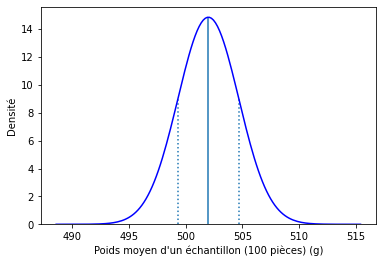

In [17]:
plt.plot(distribution_echantillon_df['poids_echantillon'],distribution_echantillon_df['dens'],color='blue')
plt.vlines(taille_echantillon*mu,ymin=0,ymax=norm.pdf(0)/sigma_echantillon_exhaustif)
plt.vlines([taille_echantillon*(mu-sigma_echantillon_exhaustif),taille_echantillon*(mu+sigma_echantillon_exhaustif)],ymin=0,ymax=norm.pdf(1)/sigma_echantillon_exhaustif,linestyles='dotted')
plt.xlabel('Poids moyen d\'un échantillon ({} pièces) (g)'.format(taille_echantillon))
plt.ylabel('Densité')
plt.ylim(bottom=0)
plt.show()

## Exercice 11.3.a: Probabilité pour que l'échantillon de 100 pièces ait un poids compris entre 496 g et 500 g

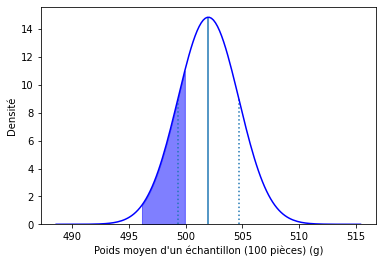

In [18]:
poids_min = 496
poids_max = 500

plt.plot(distribution_echantillon_df['poids_echantillon'],distribution_echantillon_df['dens'],color='blue')
sub_df = distribution_echantillon_df[(distribution_echantillon_df['poids_echantillon']>=poids_min)&(distribution_echantillon_df['poids_echantillon']<=poids_max)]
plt.fill_between(sub_df['poids_echantillon'],sub_df['dens'],color='blue',alpha=0.5)
plt.vlines(taille_echantillon*mu,ymin=0,ymax=norm.pdf(0)/sigma_echantillon_exhaustif)
plt.vlines([taille_echantillon*(mu-sigma_echantillon_exhaustif),taille_echantillon*(mu+sigma_echantillon_exhaustif)],ymin=0,ymax=norm.pdf(1)/sigma_echantillon_exhaustif,linestyles='dotted')
plt.xlabel('Poids moyen d\'un échantillon ({} pièces) (g)'.format(taille_echantillon))
plt.ylabel('Densité')
plt.ylim(bottom=0)
plt.show()

In [19]:
aire = (norm.cdf(poids_max/taille_echantillon,mu,sigma_echantillon_exhaustif)-norm.cdf(poids_min/taille_echantillon,mu,sigma_echantillon_exhaustif))
print('Aire bleue sous la courbe:{:.4f}'.format(aire))
print('ou encore {:.2f}% de chance que la moyenne d\'échantillon tombe dans l\'intervalle [{},{}] g'.format(aire*100,poids_min,poids_max))

Aire bleue sous la courbe:0.2155
ou encore 21.55% de chance que la moyenne d'échantillon tombe dans l'intervalle [496,500]


## Exercice 11.3.b Poid total d'échantillon supérieur à 510 g (100 pièces)

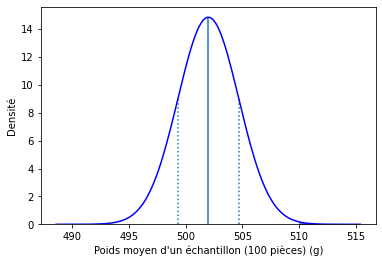

In [20]:
poids_max = 510

plt.plot(distribution_echantillon_df['poids_echantillon'],distribution_echantillon_df['dens'],color='blue')
sub_df = distribution_echantillon_df[distribution_echantillon_df['poids_echantillon']>=poids_max]
plt.fill_between(sub_df['poids_echantillon'],sub_df['dens'],color='blue',alpha=0.5)
plt.vlines(taille_echantillon*mu,ymin=0,ymax=norm.pdf(0)/sigma_echantillon_exhaustif)
plt.vlines([taille_echantillon*(mu-sigma_echantillon_exhaustif),taille_echantillon*(mu+sigma_echantillon_exhaustif)],ymin=0,ymax=norm.pdf(1)/sigma_echantillon_exhaustif,linestyles='dotted')
plt.xlabel('Poids moyen d\'un échantillon ({} pièces) (g)'.format(taille_echantillon))
plt.ylabel('Densité')
plt.ylim(bottom=0)
plt.show()

In [23]:
aire = 1-norm.cdf(poids_max/taille_echantillon,mu,sigma_echantillon_exhaustif)
print('Aire bleue sous la courbe:{}'.format(aire))
print('ou {:.2f}% de chance d\'avoir un échantillon de poids total supérieur à {} g'.format(aire*100,poids_max))

Aire bleue sous la courbe:0.0014485937537472848
ou 0.14% de chance d'avoir un échantillon de poids total supérieur à 510 g


On ne voit pas grand chose... mais en zoomant sur l'intervalle [505,515], on voit mieux, et on a:

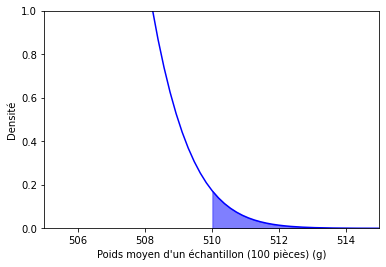

In [24]:
poids_max = 510
plt.plot(distribution_echantillon_df['poids_echantillon'],distribution_echantillon_df['dens'],color='blue')
sub_df = distribution_echantillon_df[distribution_echantillon_df['poids_echantillon']>=poids_max]
plt.fill_between(sub_df['poids_echantillon'],sub_df['dens'],color='blue',alpha=0.5)
plt.vlines(taille_echantillon*mu,ymin=0,ymax=norm.pdf(0)/sigma_echantillon_exhaustif)
plt.vlines([taille_echantillon*(mu-sigma_echantillon_exhaustif),taille_echantillon*(mu+sigma_echantillon_exhaustif)],ymin=0,ymax=norm.pdf(1)/sigma_echantillon_exhaustif,linestyles='dotted')
plt.xlabel('Poids moyen d\'un échantillon ({} pièces) (g)'.format(taille_echantillon))
plt.ylabel('Densité')
plt.ylim(0,1)
plt.xlim(505,515)
plt.show()